# Affine Color Correction 

Made by: Haley Schuhl

Adapted from a tutorial by: Katie Murphy

Updated: December 1, 2023

# Section 1: Importing Image and Libraries

First, import the necessary packages. 

In [ ]:
# Install PlantCV and required dependencies
%pip install "altair>=5" ipympl plantcv

# Give access and mount your Google Drive (need a Google Account)
# Change path to directory you wish output files to be saved to.
from google.colab import drive
drive.mount('/content/gdrive')

# Enable widget feature with matplotlib
from google.colab import output
output.enable_custom_widget_manager()

#View working directory, may need to change path
%pwd

# Section 1: Importing Image and Libraries

In [1]:
%matplotlib widget

# Imports 
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
#pcv.__version__ 

## Input/Output variables

Next, import a sample image. Your images need to be on the server. Remember, always keep your raw images separate from your newly processed images! You will need to change the path to your image, and also if you want specific output folders and directories.

In [2]:
# Input/output options
args = WorkflowInputs(
    images=["./img/1_B73_sand_C_2023-04-14_10_19_07.jpg"],
    names="image",
    result="results.txt",
    outdir=".",
    writeimg=False,
    debug="plot",
    sample_label="B73"
    )

In [3]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
pcv.params.sample_label = args.sample_label
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 2
pcv.params.text_thickness = 2

## Read the input image

### Google Colaboratory Users:
If you are running this notebook using Google Colaboratory, you will need to use the cell below to complete the tutorial unless you cloned the repository from GitHub to your personal Google Drive account. Once you begin developing your workflow for your data, you can delete this text cell and the code cell below so you avoid any conflicts the next time you use this notebook.

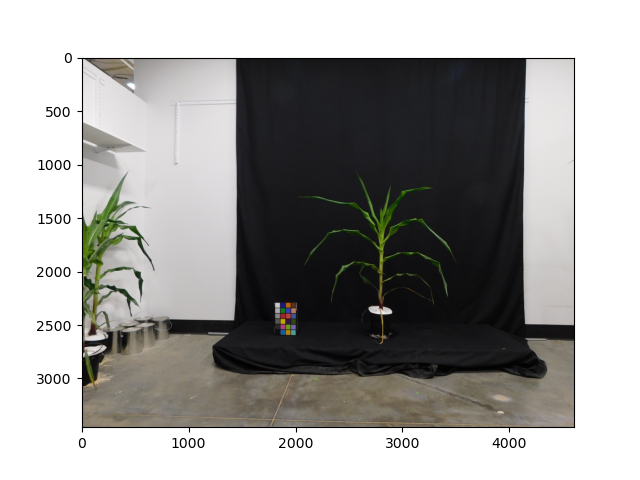

In [4]:
img = pcv.io.open_url(url="https://raw.githubusercontent.com/danforthcenter/plantcv-tutorial-color-correction/main/img/1_B73_sand_C_2023-04-14_10_19_07.jpg")

### Local system use:
If you have downloaded this notebook or the repository to your local device, then you will need to use the cell below to bring your image into the notebook. Do not run this line if you are navigating through the **tutorial** using Google Colaboratory.

NOTE: *If you are developing your own workflow using this notebook, make sure you remove the code cell above with the URL and uncomment (remove the hashtag [#] to make the code active. This will call the image you defined during the Inputs/Outputs step.*

### Reading images into your environment using *pcv.readimage()*
Inputs:
   * filename = Image file to be read in
   * mode     = How the image will be read into the notebook; either 'native' (default), 'rgb', 'gray', 'csv', or 'envi'

In [5]:
# img, path, filename = pcv.readimage(filename=args.image1)

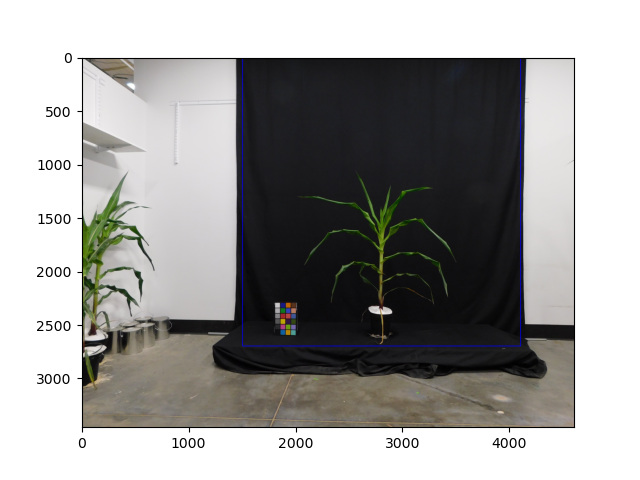

In [6]:
crop_img = pcv.crop(img=img, x=1500, y=0, w=2600, h=2700)

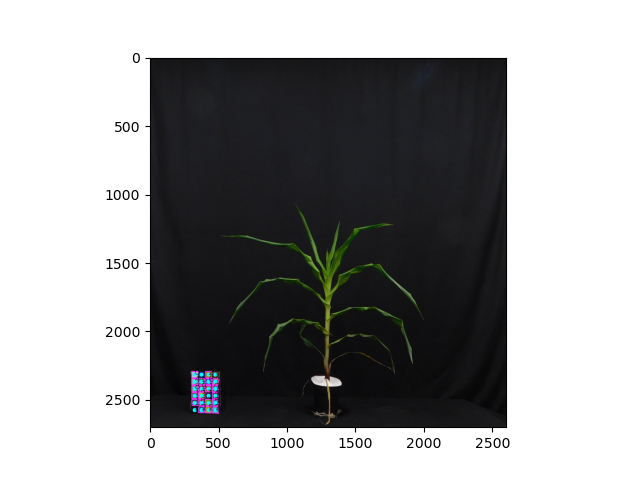

[1971.0]


In [7]:
# First, detect the color card.
card_mask = pcv.transform.detect_color_card(rgb_img=crop_img, radius=15)

# Print average chip size, value is stored in outputs.observations 
print(pcv.outputs.metadata['median_color_chip_size']['value'])

In [8]:
# Make a color card matrix 

headers, card_matrix = pcv.transform.get_color_matrix(rgb_img=crop_img, mask=card_mask)

In [9]:
# Define the standard color card matrix, we know what the colors of those chips should be in a "perfect" 
# image, so we will correct to those known values

# When using detect_color_card, you will always set pos=3

std_color_matrix = pcv.transform.std_color_matrix(pos=3)

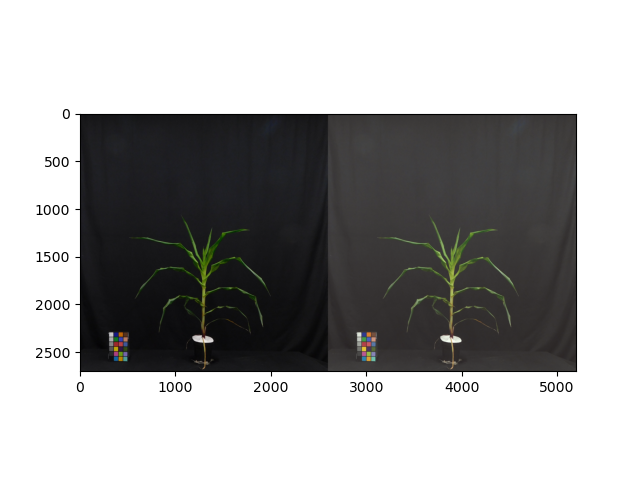

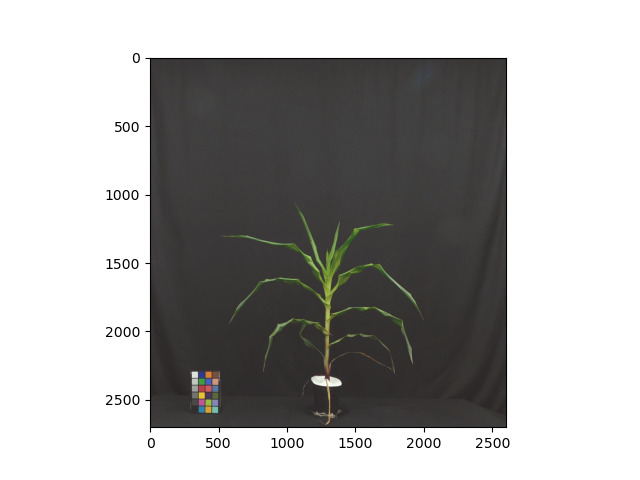

In [10]:
# Color correct your image to the standard values

img_cc = pcv.transform.affine_color_correction(rgb_img=crop_img, source_matrix=card_matrix, 
                                               target_matrix=std_color_matrix)
pcv.plot_image(img_cc)

In [11]:
# If you want to save your color corrected image, do so here. Do NOT save over your raw image. 
# We are saving as a temporary image here becasue we want to use it for thresholding. 

pcv.print_image(img=img_cc, filename="./img/color_corrected_img_temp.png")